## Data Analysis of given Instacart set

### Executive Summary

#### [Importing Data set](#Import-DataSet)


####  [Distribution of orders -](#Order-Distribution)

Around 60% of the orderes comes from around 11 am to 6 p.m. With dow  of 0 as sunday, Most of the orders are placed 
on Sunday and Monday. Seems like users love to begin week with groceseris list. For analysis purpose, time of orders 
are divided into 4 different category. Mos tof orders comes in Afternoon to evening time with least number of orders
placed after 8 pm.
 
#### [Users - ](#Users-Analysis-Section)
Users have placed minimum of 4 orders to max of 100 ordets. Around 64% of users have placed prior order which means
Insta cart has good repeating customer base

#### [Products -](#Products)
Frequenctly orderered products?
Banana, Organic items seems to be most ordered items.

Products - Frequently re-ordered products ?
When top ten ordereditemsare observed, we can conclude that Banana is most ordered as well as re-ordred items. Produce section is cleare 
winner here!! Though Organic items lists in top ten, when over all  order is considered then most of the orders
has non-organic stuff!


#### [Departments  -](#Department-Analysis)
When all orders are analysed, most variety of products comes from personal care department with Pantry section stands next. 
Produce section tops in the most ordered product;s department with dairy eggs comes next to it. 





### Import DataSet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings

warnings.filterwarnings('ignore')

In [3]:
ipr = pd.read_csv('../data/ipr.csv')


In [4]:
#ipr.drop(columns='Unnamed: 0', inplace=True
ipr.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'max_purchasecount', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Afternoon',
       'Evening', 'Morning', 'Night'],
      dtype='object')

In [4]:
ipr.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,...,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Afternoon,Evening,Morning,Night
0,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,112108,train,4,...,0,0,0,1,0,0,1,0,0,0
1,1,47209,7,0,Organic Hass Avocado,24,4,112108,train,4,...,0,0,0,1,0,0,1,0,0,0
2,1,10246,3,0,Organic Celery Hearts,83,4,112108,train,4,...,0,0,0,1,0,0,1,0,0,0
3,1,49302,1,1,Bulgarian Yogurt,120,16,112108,train,4,...,0,0,0,1,0,0,1,0,0,0
4,1,13176,6,0,Bag of Organic Bananas,24,4,112108,train,4,...,0,0,0,1,0,0,1,0,0,0
5,1,22035,8,1,Organic Whole String Cheese,21,16,112108,train,4,...,0,0,0,1,0,0,1,0,0,0
6,1,49683,4,0,Cucumber Kirby,83,4,112108,train,4,...,0,0,0,1,0,0,1,0,0,0
7,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,112108,train,4,...,0,0,0,1,0,0,1,0,0,0
8,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,...,0,0,0,0,0,0,1,0,0,0
9,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,202279,prior,3,...,0,0,0,0,0,0,1,0,0,0


#### Order Distribution

In [6]:
# Empirical cumulative distribution functions
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

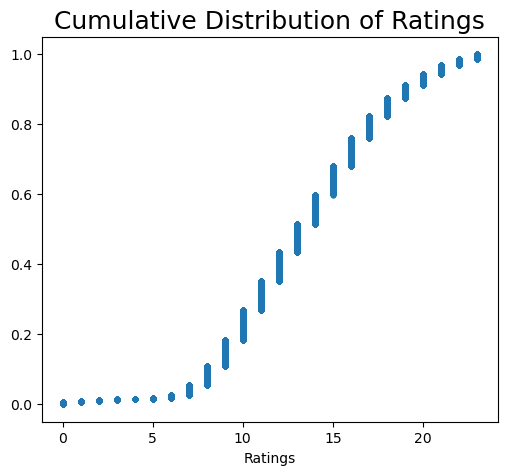

In [7]:
plt.figure(figsize=(20,5))

# Plot cumulative distribution of ratings
x, y = ecdf(ipr.order_hour_of_day)

ax1 = plt.subplot(1,3,1)
ax1.set_xlabel('Order hour')
ax1.set_title('Cumulative Distribution of Orders', fontsize=18)
plt.plot(x, y, marker='.', linestyle='none')

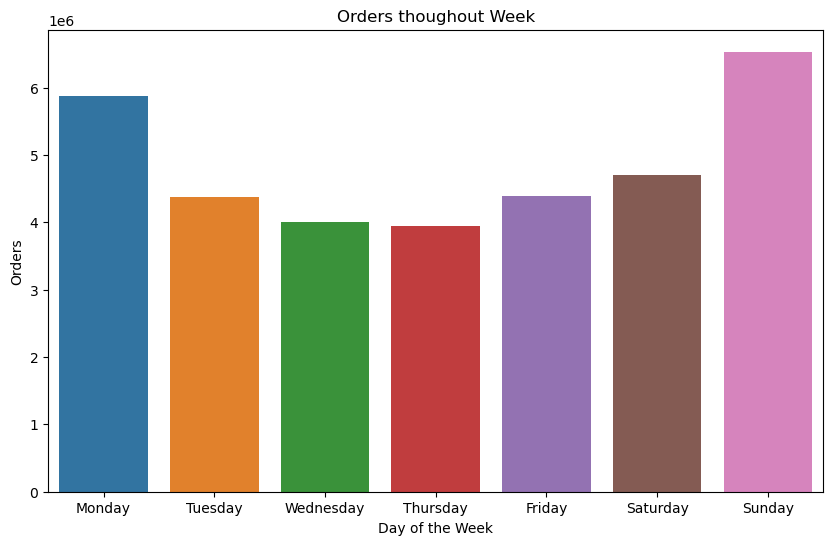

In [4]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday', 'Sunday']

# Create a bar plot for the specified columns
plt.figure(figsize=(10, 6))
sns.barplot(data=ipr[days_order].sum().reset_index(), x='index', y=0, order=days_order)
plt.xlabel('Day of the Week')
plt.ylabel('Orders')
plt.title('Orders thoughout Week')

plt.show()




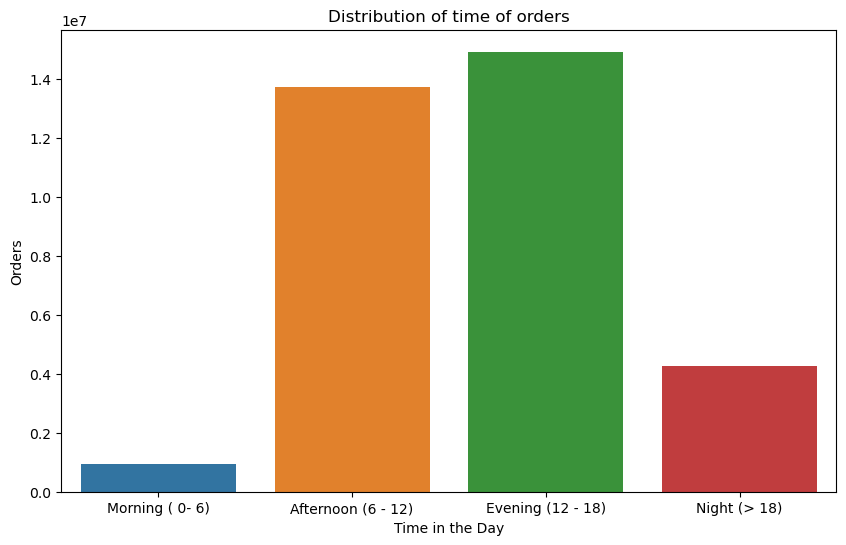

In [5]:
Timein_day_orderlabel = ['Morning ( 0- 6)', 'Afternoon (6 - 12)', 'Evening (12 - 18)', 'Night (> 18)']
Timein_day_order = ['Morning', 'Afternoon', 'Evening', 'Night']
# Create a bar plot for the specified columns
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=ipr[Timein_day_order].sum().reset_index(), x='index', y=0, order=Timein_day_order)

ax.set_xticklabels(Timein_day_orderlabel)
plt.xlabel('Time in the Day')
plt.ylabel('Orders')
plt.title('Distribution of time of orders')

plt.show()

<Figure size 1000x600 with 0 Axes>

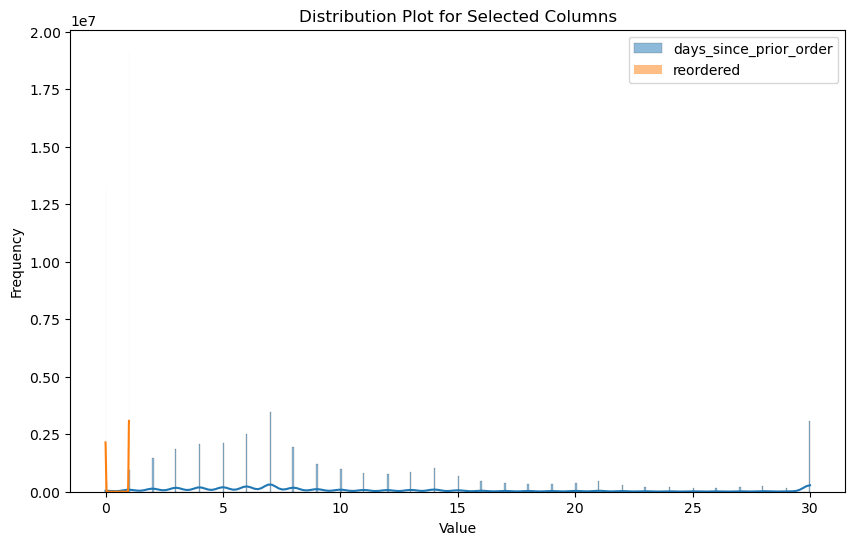

In [34]:
plt.figure(figsize=(10,6))
selected_columns = ['days_since_prior_order','reordered']
plt.figure(figsize=(10,6))
for col in selected_columns:
    sns.histplot(ipr[col],kde=True, label=col)
plt.xlabel('Orders')
plt.ylabel('Frequency')
plt.title('Distribution Plot for Days since prior order and reordered Columns')
plt.legend()
plt.show()



   

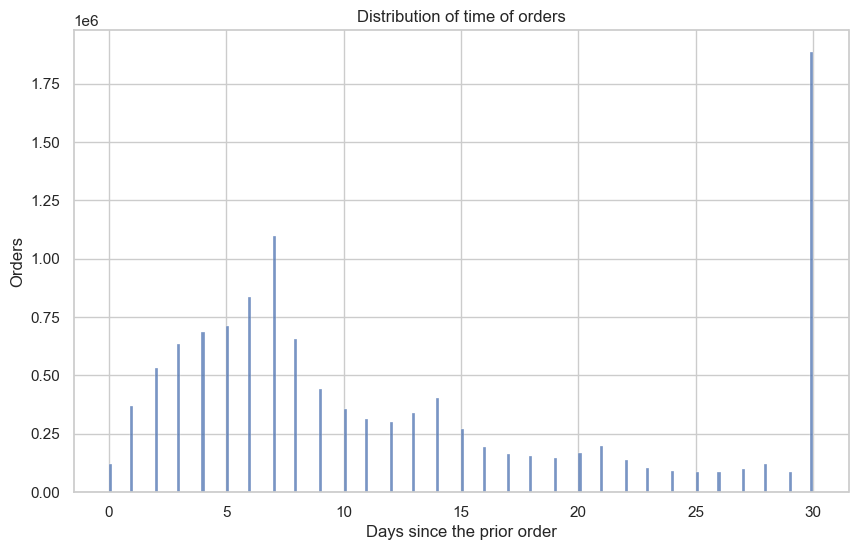

In [53]:
# Create a bar plot for the specified columns
plt.figure(figsize=(10, 6))
sns.histplot(data=ipr[ipr['reordered'] == 0]['days_since_prior_order'])

plt.xlabel('Days since the prior order')
plt.ylabel('Orders')
plt.title('Distribution of time of orders')

plt.show()

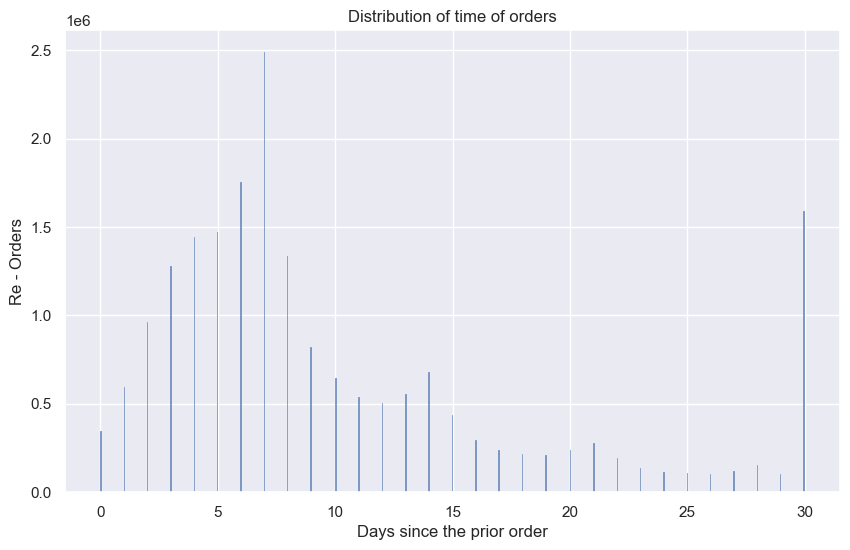

In [34]:
# Create a bar plot for the specified columns
plt.figure(figsize=(10, 6))
sns.histplot(data=ipr[ipr['reordered'] == 1]['days_since_prior_order'])

plt.xlabel('Days since the prior order')
plt.ylabel('Re - Orders')
plt.title('Distribution of time of orders')

plt.show()

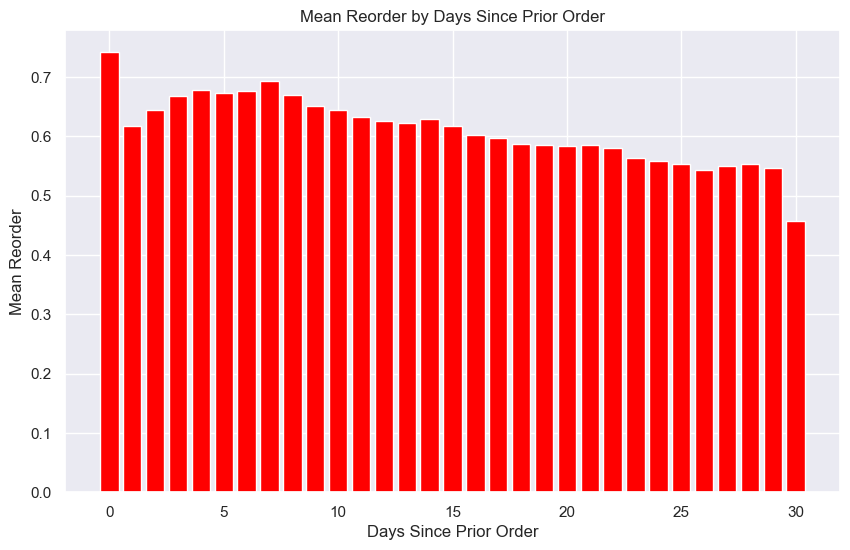

In [35]:
 summary_data = ipr.groupby('days_since_prior_order')['reordered'].mean().reset_index()
    
    # Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(summary_data['days_since_prior_order'], summary_data['reordered'], color='red')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Mean Reorder')
plt.title('Mean Reorder by Days Since Prior Order')
plt.show()

In [37]:
print(summary_data.sort_values(by ='reordered', ascending = False))

    days_since_prior_order  reordered
0                      0.0   0.741885
7                      7.0   0.693942
4                      4.0   0.677518
6                      6.0   0.677089
5                      5.0   0.673978
8                      8.0   0.670542
3                      3.0   0.668317
9                      9.0   0.651244
2                      2.0   0.644964
10                    10.0   0.644011
11                    11.0   0.631868
14                    14.0   0.629245
12                    12.0   0.626788
13                    13.0   0.621834
1                      1.0   0.617577
15                    15.0   0.617053
16                    16.0   0.601963
17                    17.0   0.597406
18                    18.0   0.586410
21                    21.0   0.585948
19                    19.0   0.584953
20                    20.0   0.583947
22                    22.0   0.580432
23                    23.0   0.564301
24                    24.0   0.558305
28          

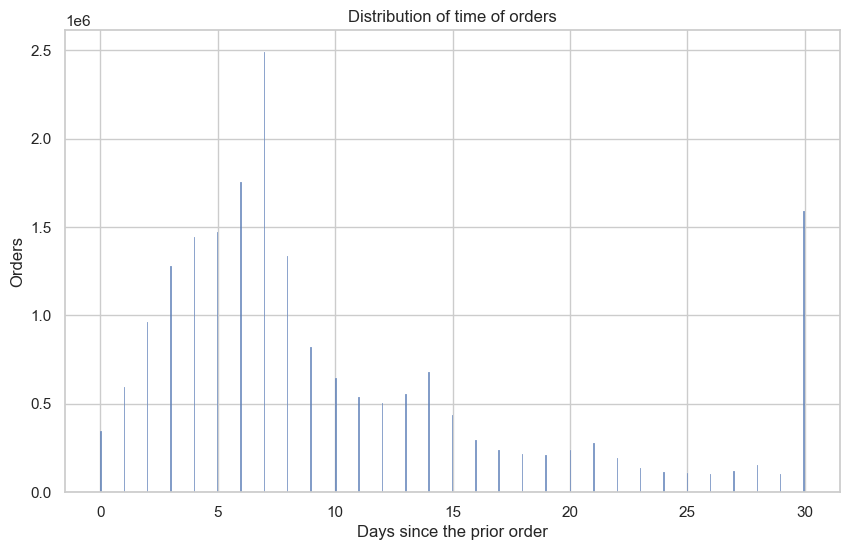

In [52]:
# Create a bar plot for the specified columns
plt.figure(figsize=(10, 6))
sns.histplot(data=ipr[ipr['reordered'] == 1]['days_since_prior_order'])

plt.xlabel('Days since the prior order')
plt.ylabel('Orders')
plt.title('Distribution of time of orders')

plt.show()

##### Target Variable Distribution 




####  Products

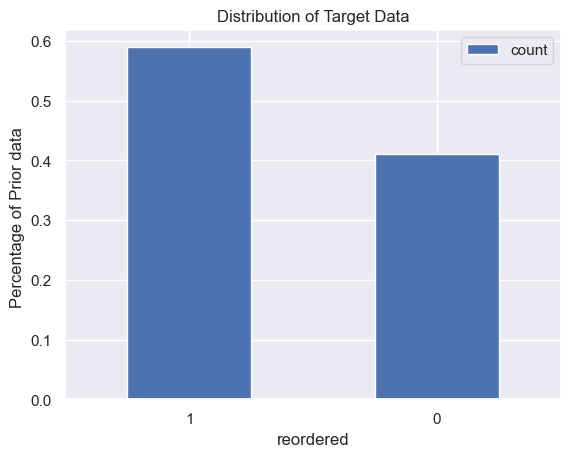

In [12]:
sns.set_theme()

ax =  (ipr[ipr['eval_set'] == 'prior']['reordered'].value_counts()  / ipr[ipr['eval_set'] == 'prior'].shape[0]).plot.bar()
ax.set_xticklabels(['1','0'] , rotation = 0)
ax.set_ylabel('Percentage of Prior data ')
ax.set_title('Distribution of Target Data')
ax.legend()

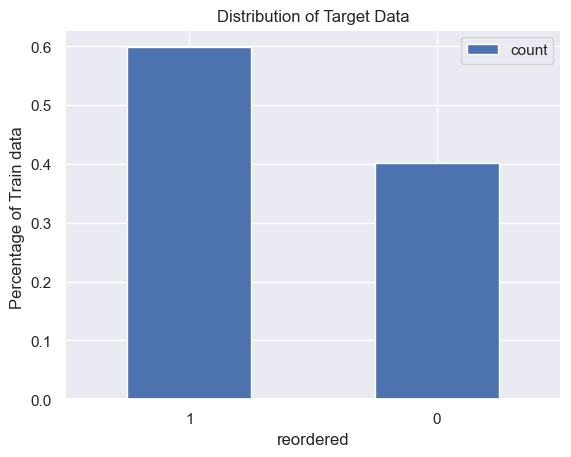

In [13]:
sns.set_theme()

ax =  (ipr[ipr['eval_set'] == 'train']['reordered'].value_counts()  / ipr[ipr['eval_set'] == 'train'].shape[0]).plot.bar()
ax.set_xticklabels(['1','0'] , rotation = 0)
ax.set_ylabel('Percentage of Train data ')
ax.set_title('Distribution of Target Data')
ax.legend()

#### Best Sellers ==== Most re-ordered items ==== Most ordered items
##### Lets see what is most bought item. Banana is the clear winner !!!

In [38]:
reorderedItems = ipr[ipr['reordered'] == 1].groupby('product_name')['reordered'].count().reset_index(name ='reordered_count').sort_values(by='reordered_count',ascending=False)
most_orderedItems = ipr.groupby(['product_name','product_id'])['reordered'].count().reset_index(name ='total_count').sort_values(by='total_count',ascending=False)


In [39]:
ordereditems_count = pd.merge(reorderedItems,most_orderedItems, on = 'product_name',how='outer')
ordereditems_count['reordered_count'] = ordereditems_count['reordered_count'].fillna(0)
ordereditems_count['reordered_count'] = ordereditems_count['reordered_count'].astype(int)
ordereditems_count = ordereditems_count.sort_values(by='total_count',ascending= False)
print(ordereditems_count.head(14))

              product_name  reordered_count  product_id  total_count
0                   Banana           415166       24852       491291
1   Bag of Organic Bananas           329275       13176       394930
2     Organic Strawberries           214448       21137       275577
3     Organic Baby Spinach           194939       21903       251705
4     Organic Hass Avocado           176173       47209       220877
5          Organic Avocado           140270       47766       184224
7              Large Lemon           112178       47626       160792
9             Strawberries           104588       16797       149445
10                   Limes           100002       26209       146660
6       Organic Whole Milk           118684       27845       142813
8      Organic Raspberries           109688       27966       142603
11    Organic Yellow Onion            82166       22935       117716
12          Organic Garlic            77704       24964       113936
13        Organic Zucchini        

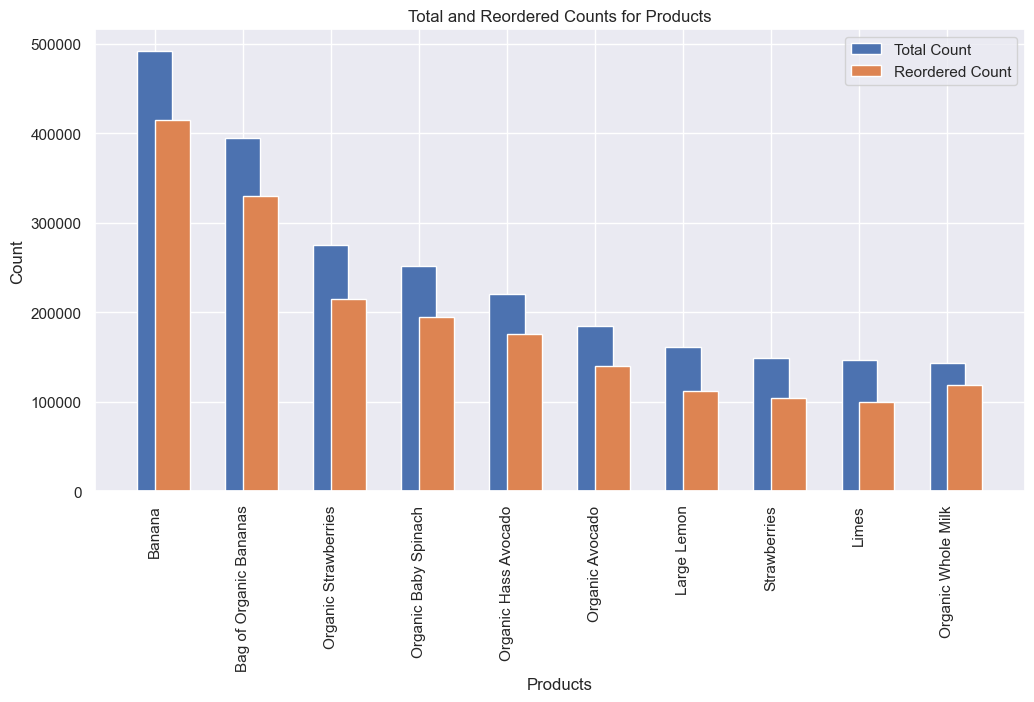

In [40]:
plt.figure(figsize=(12,6))
ordereditems_countg = ordereditems_count.head(10)
x = ordereditems_countg['product_name']
plt.bar( x, ordereditems_countg['total_count'],width = 0.4, label ='Total Count',align='center')
plt.bar( x, ordereditems_countg['reordered_count'],width = 0.4, label ='Reordered Count',align='edge')
# Set the x-axis labels to product names
plt.xticks(x, ordereditems_countg['product_name'], rotation=90)


# Set labels and legend
plt.xlabel('Products')
plt.ylabel('Count')
plt.xticks
plt.title('Total and Reordered Counts for Products')
plt.legend()


In [65]:
print("Products reordered only once :",reorderedItems[reorderedItems['reordered_count']== 1].nunique())
print("Products which were never ordered \n:",ipr.groupby('product_name')['reordered'].value_counts().reset_index(name= 'count')[ipr['reordered'] == 0]).sort_values(by = 'count', ascending = True))

Products reordered only once : product_name       2893
reordered_count       1
dtype: int64
Products which were never ordered 
:                                             product_name  reordered   count
84433                               Sweet Potato Ribbons          1       1
41591                                Kale & Quinoa Bites          1       1
73642                     Roasted & Salted Pumpkin Seeds          1       1
70051                      Pumpkin Pancakes & Waffle Mix          1       1
34578  Graduates  Fruit Pick-Ups Yellow Cling Diced P...          1       1
...                                                  ...        ...     ...
62439                               Organic Yellow Onion          1   82166
44788                                              Limes          1  100002
42858                                        Large Lemon          1  112178
58018                               Organic Hass Avocado          1  176173
61193                              

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x600 with 0 Axes>

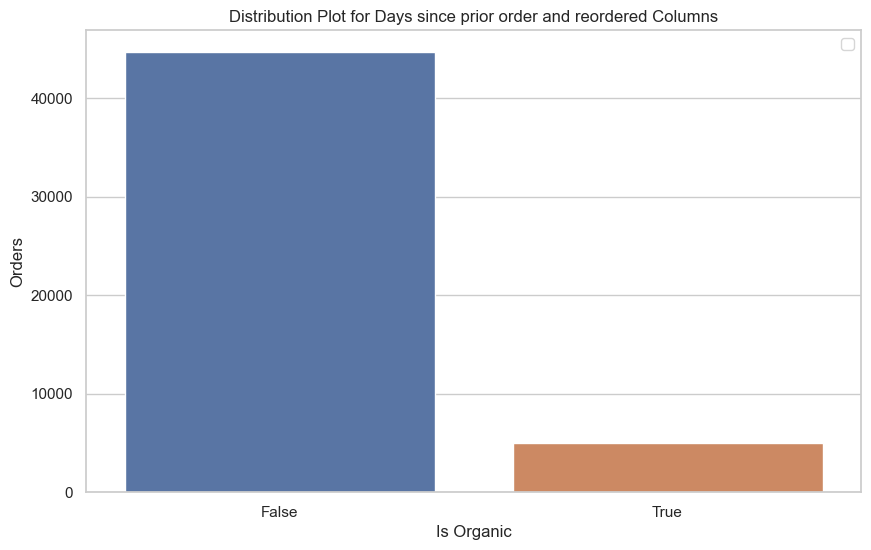

In [112]:
#Lets check whether organic or non-organic items are ordered more
# which items are ordered more
ordereditems_count['is_organic'] = ordereditems_count['product_name'].str.contains('organic', case =False, na= False)

plt.figure(figsize=(10,6))
plt.figure(figsize=(10,6))
sns.countplot(data =ordereditems_count, x ='is_organic')
plt.xlabel('Is Organic')
plt.ylabel('Orders')
plt.title('Organic vs Non-Organic product orders')
plt.legend()
plt.show()



In [82]:
most_orderedItems.head(7)

,product_name,product_id,count
3677,Banana,24852,491291
3472,Bag of Organic Bananas,13176,394930
31923,Organic Strawberries,21137,275577
28843,Organic Baby Spinach,21903,251705
30300,Organic Hass Avocado,47209,220877
28807,Organic Avocado,47766,184224
22415,Large Lemon,47626,160792


In [118]:
ordereditems_count.reordered_count.sum() /ordereditems_count.total_count.sum()

0.5900617242809434

### Number of prior order

In [199]:
prior_order = ipr[ipr['eval_set'] == 'prior'].groupby('user_id')['order_id'].count().reset_index(name='count').sort_values(by ='count')
prior_order= prior_order.sort_values(by ='count',ascending = False).reset_index()




In [48]:
print(prior_order.head(2))
print(prior_order.tail(2))

   level_0   index  user_id  count
0        0  201267   201268   3725
1        1  129927   129928   3638
        level_0   index  user_id  count
206207   206001  168360   168361      3
206208   206208  166063   166064      3


In [ ]:
print(prior_order.head(2))

Text(0.5, 1.0, 'Count of prior orders for customers')

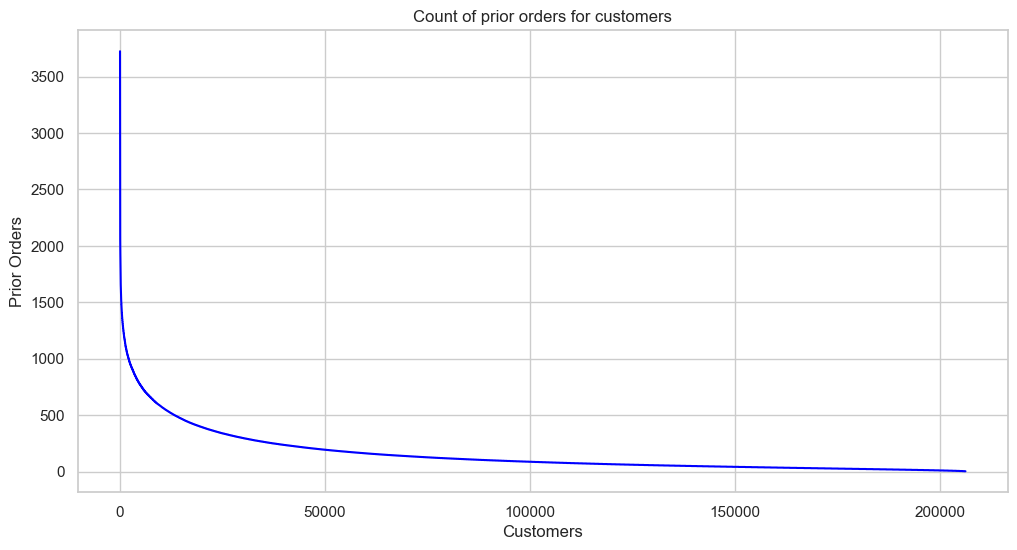

In [46]:

plt.figure(figsize=(12,6))

sns.set(style='whitegrid')

sns.lineplot(y = prior_order['count'], x = prior_order.index,color='blue',sort =False)

plt.xlabel('Customers')
plt.ylabel('Prior Orders')
plt.title("Count of prior orders for customers")

#### Users Analysis Section

##### Customers who placed the most orders 

In [146]:
filtered_group = ipr.groupby(['user_id','eval_set'])['eval_set'].nunique().count()#.reset_index(name='count')#.filter(lambda x: count > 1)
users_with_both_eval_sets = ipr.groupby('user_id').filter(lambda x: 'prior' in x['eval_set'].values and 'train' in x['eval_set'].values)['user_id'].unique()

In [162]:
percentage = len(users_with_both_eval_sets) / ipr['user_id'].nunique() * 100

print (f"{percentage:.2f} %  of users have placed prior orders i.e they are repeating customers")

63.63 %  of users have placed prior orders i.e they are repeating customers


In [19]:
user_group = ipr.groupby(['user_id'])['order_id'].nunique().reset_index(name='order_count').sort_values(by='order_count',ascending = False)
orders_count = ipr.groupby(['user_id'])['order_id'].agg(lambda group: len(group.unique()))\
                .reset_index(name='order_count')\
                .set_index('user_id')


In [21]:
user_group.head(10)
print("Minimum orders per user :",user_group['order_count'].min())

print("Maximum orders per user :",user_group['order_count'].max())

#pr[ipr['user_id']  == 99753].to_csv('custoemr1.sv')
#print(user_group[user_group['user_id']  == 99753])

Minimum orders per user : 3
Maximum orders per user : 100


##### Which item do people put into the cart first?

People seems to be quite ceratin about  

In [212]:
#cart_first_item = ipr.groupby(['order_id'])['product_id'].agg(product_id = 'min').reset_index()
cart_first_item = ipr.groupby(['product_id', 'add_to_cart_order']).size().reset_index(name='count')
cart_first_item['pct'] = cart_first_item['count'] / grouped_data['count'].sum()
product_list = ipr[['product_id','product_name']].drop_duplicates()
cart_first_item = pd.merge(cart_first_item,product_list, on = 'product_id', how = 'left')



In [247]:
cart_first_item[cart_first_item['add_to_cart_order'] == 1].sort_values(by='count', ascending = False).head(10)

,product_id,add_to_cart_order,count,pct,product_name
558921,24852,1,115521,0.003416,Banana
294979,13176,1,82877,0.002451,Bag of Organic Bananas
625535,27845,1,32071,0.000948,Organic Whole Milk
474956,21137,1,28875,0.000854,Organic Strawberries
1061971,47209,1,24913,0.000737,Organic Hass Avocado
492527,21903,1,24412,0.000722,Organic Baby Spinach
1074431,47766,1,23393,0.000692,Organic Avocado
442138,19660,1,17552,0.000519,Spring Water
377064,16797,1,17073,0.000505,Strawberries
628180,27966,1,14950,0.000442,Organic Raspberries


#### Department Analysis

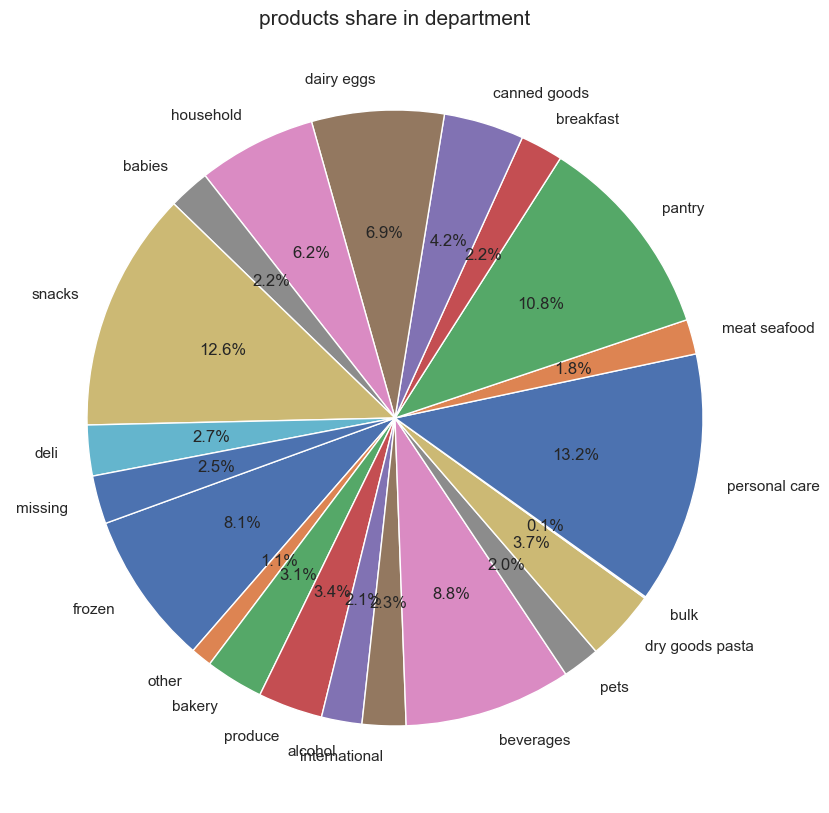

In [312]:
products_cnt = ipr.groupby('product_id')['product_id'].count().reset_index(name ='product_count')

departments = pd.read_csv('../data/departments.csv')
products  = pd.read_csv('../data/products.csv')

dept_products = pd.merge(products_cnt, products, on='product_id', how='inner')
departments_names = pd.merge(dept_products, departments, on='department_id', how='inner')

departments_cnt = departments_names.groupby(['department_id','department'])['department_id'].count().reset_index(name ='dept_count')
plt.figure(figsize=(10,10))
temp_series = departments_cnt.value_counts()
labels = (np.array(departments_cnt.department))
sizes = (np.array((departments_cnt.dept_count / departments_cnt.dept_count.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("products share in department", fontsize=15)
plt.show()



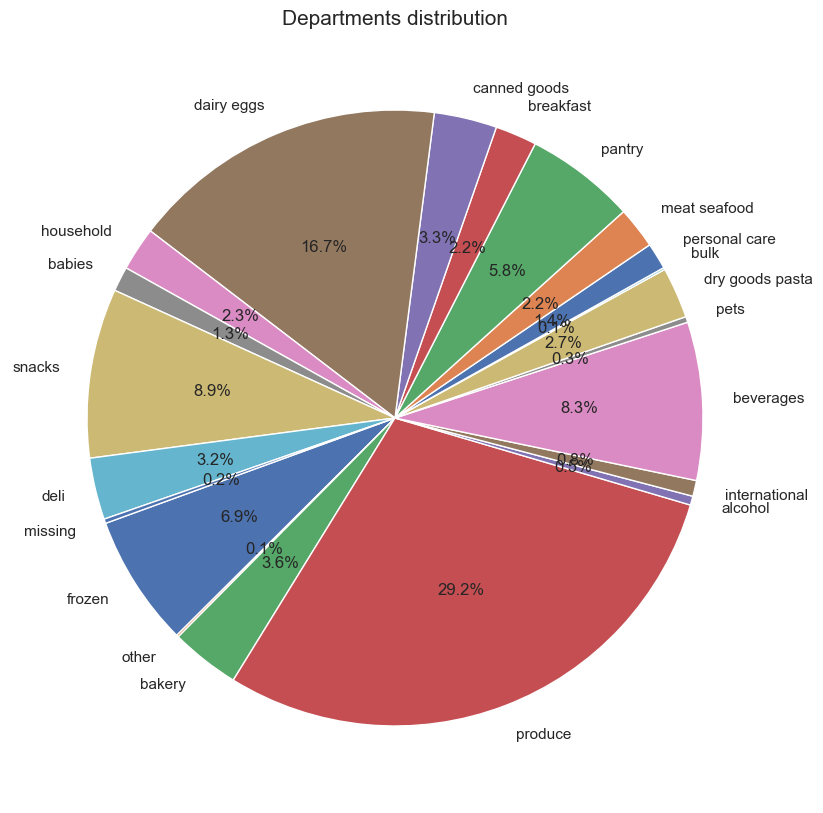

In [318]:
deporder_cnt =  departments_names.groupby(['department_id','department'])['product_count'].sum().reset_index(name ='order_sum')
plt.figure(figsize=(10,10))
temp_series = deporder_cnt.value_counts()
labels = (np.array(deporder_cnt.department))
sizes = (np.array((deporder_cnt.order_sum / deporder_cnt.order_sum.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

In [317]:
departments_names.head(10)

,product_id,product_count,product_name,aisle_id,department_id,department
0,1,1928,Chocolate Sandwich Cookies,61,19,snacks
1,16,20,Mint Chocolate Flavored Syrup,103,19,snacks
2,25,2252,Salted Caramel Lean Protein & Fiber Bar,3,19,snacks
3,32,569,Nacho Cheese White Bean Chips,107,19,snacks
4,41,52,Organic Sourdough Einkorn Crackers Rosemary,78,19,snacks
5,56,30,Healthy Pop Butter Popcorn,23,19,snacks
6,59,29,Medium Taqueria Style Chipotle Salsa,50,19,snacks
7,77,306,Coconut Chocolate Chip Energy Bar,3,19,snacks
8,78,12,Nutter Butter Cookie Bites Go-Pak,61,19,snacks
9,93,1892,Uncured Cracked Pepper Beef,23,19,snacks


In [73]:
print(ipr.department.value_counts()[:10])

department
produce            9888378
dairy eggs         5631067
snacks             3006412
beverages          2804175
frozen             2336858
pantry             1956819
bakery             1225181
canned goods       1114857
deli               1095540
dry goods pasta     905340
Name: count, dtype: int64


In [319]:
deporder_cnt.sort_values(by='order_sum',ascending = False)

,department_id,department,order_sum
3,4,produce,9888378
15,16,dairy eggs,5631067
18,19,snacks,3006412
6,7,beverages,2804175
0,1,frozen,2336858
12,13,pantry,1956819
2,3,bakery,1225181
14,15,canned goods,1114857
19,20,deli,1095540
8,9,dry goods pasta,905340


The minimum 'order_hour_of_day' is 0.
For 'order_hour_of_day,' it's 10.
For 'order_hour_of_day,' it's 13.
For 'order_hour_of_day,' it's 16.
The maximum 'order_hour_of_day' is 23.
For 'order_dow,' it's 1.
50%- 50th percentile For 'order_dow,' it's 3.
75% For 'order_dow,' it's 5.
The maximum 'order_dow' is 6.


Count: There are 33,819,110 rows of data in the 'order_hour_of_day' column.
Mean: The average 'order_hour_of_day' is approximately 13.43, which suggests that, on average, orders are placed around midday.
Std (Standard Deviation): The standard deviation is approximately 4.25, indicating a moderate spread around the mean.
Min: The minimum 'order_hour_of_day' value is 0, which means there are orders placed at midnight.
25%: The 25th percentile value is 10, indicating that 25% of the orders are placed before or at 10 AM.
50% (Median): The median 'order_hour_of_day' value is 13, meaning that 50% of the orders are placed before or at 1 PM.
75%: The 75th percentile value is 16, suggesting that 75% of the orders are placed before or at 4 PM.
Max: The maximum 'order_hour_of_day' value is 23, indicating that orders are placed up until 11 PM.

max_purchasecount:

Count: There are also 33,819,110 rows of data in the 'max_purchasecount' column.
Mean: The average 'max_purchasecount' is approximately 33.36, which indicates that, on average, users have a maximum purchase count of around 33.
Std (Standard Deviation): The standard deviation is approximately 25.09, suggesting moderate variability in maximum purchase counts.
Min: The minimum 'max_purchasecount' value is 4, meaning that some users have a maximum purchase count as low as 4.
25%: The 25th percentile value is 13, indicating that 25% of users have a maximum purchase count of 13 or lower.
50% (Median): The median 'max_purchasecount' value is 26, meaning that 50% of users have a maximum purchase count of 26 or lower.
75%: The 75th percentile value is 47, suggesting that 75% of users have a maximum purchase count of 47 or lower.
Max: The maximum 'max_purchasecount' value is 100, indicating that some users have a maximum purchase count of 100.
These statistics provide insights into the distribution and central tendencies of the 'order_hour_of_day' and 'max_purchasecount' columns, which can be useful for data analysis and understanding user behavior regarding order hours and purchase counts.




In [7]:
ipr[['user_id','order_hour_of_day','order_dow']].describe()

,user_id,order_hour_of_day,order_dow
count,3.381911e+07,3.381911e+07,3.381911e+07
mean,1.029444e+05,1.343123e+01,2.737285e+00
std,5.946733e+04,4.246149e+00,2.093296e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,5.143500e+04,1.000000e+01,1.000000e+00
50%,1.026260e+05,1.300000e+01,3.000000e+00
75%,1.544120e+05,1.600000e+01,5.000000e+00
max,2.062090e+05,2.300000e+01,6.000000e+00


In [6]:
ipr[['order_hour_of_day','max_purchasecount']].describe()

,order_hour_of_day,max_purchasecount
count,3.381911e+07,3.381911e+07
mean,1.343123e+01,3.335812e+01
std,4.246149e+00,2.508884e+01
min,0.000000e+00,4.000000e+00
25%,1.000000e+01,1.300000e+01
50%,1.300000e+01,2.600000e+01
75%,1.600000e+01,4.700000e+01
max,2.300000e+01,1.000000e+02


Text(0.5, 1.0, 'Frequently re-ordered Product Aisle')

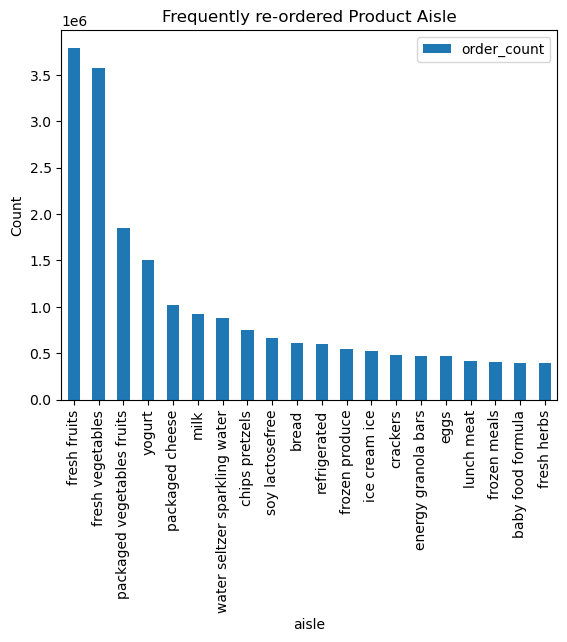

In [10]:
#plot bar plot of top 20 aisles on order count
df = ipr.groupby(['aisle']).size().reset_index(name='order_count')
ax = df[['aisle','order_count']].sort_values(by='order_count', ascending = False)[:20].plot.bar(x = 'aisle' , y = 'order_count')
ax.set_ylabel("Count")
ax.set_title('Frequently ordered Product Aisle')

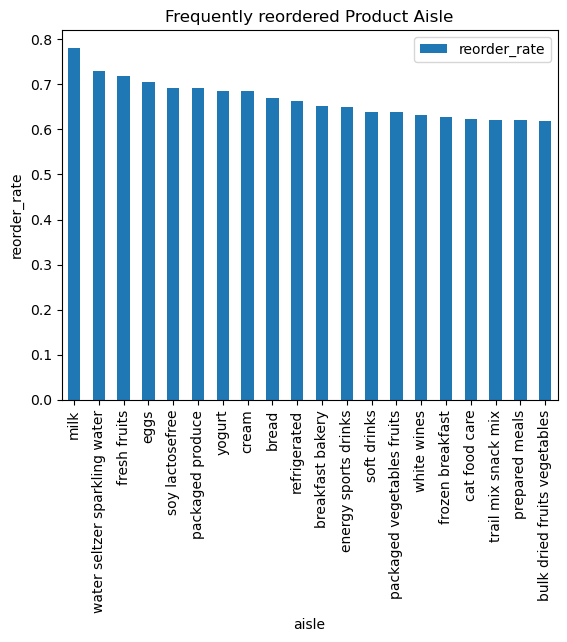

In [12]:
#plot bar plot of top 20 aisles on order count

aisle_reorder_rate = ipr[ipr['reordered']==1].groupby(['aisle']).size().reset_index(name='reorder_rate')
df['reorder_rate'] = aisle_reorder_rate['reorder_rate']/df['order_count']
ax = df[['aisle','reorder_rate']].sort_values(by='reorder_rate', ascending = False)[:20].plot.bar(x = 'aisle', y='reorder_rate')
ax.set_ylabel("reorder_rate")
ax.set_title('Frequently reordered Product Aisle')
ax.legend()

In [322]:
ipr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 25 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   user_id                 int64  
 8   eval_set                object 
 9   order_number            int64  
 10  order_dow               int64  
 11  order_hour_of_day       int64  
 12  days_since_prior_order  float64
 13  max_purchasecount       int64  
 14  Friday                  int64  
 15  Monday                  int64  
 16  Saturday                int64  
 17  Sunday                  int64  
 18  Thursday                int64  
 19  Tuesday                 int64  
 20  Wednesday               int64  
 21  Afternoon               int64